# <center style="font-size:140%;"> Report - Project Assignment #*3*

<center>
<span style="font-size:160%;">**McGill University, Montreal** </span> <br>
MECH(447|652) - Dynamics of Combustion <br>
Project Assignment #*3* 
</center>

<center>Submitted to 
<center>**Gilles Bourque**
<center>by
<center>**Saad Sarfraz Malik (260559335)**

<center>14 November 2018
<center>Montreal, Quebec, Canada

## Table of Content

* [Introduction](#Introduction)

* [Part 1 - Perfectly Stirred Reactor](#Part-1---Perfectly-Stirred-Reactor)
    * [1.1 - Mass Flow Rate & Equivalence Ratio](#Mass-Flow-Rate-&-Equivalence-Ratio)
    * [1.2 - Equilibrium](#Equilibrium-Method)
    * [1.3 - PSR](#PSR-Method)
    * [1.4 - Residence Time](#Residence-Time)
    * [1.5 - Comparison](#Explanation)
    
* [Part 2 - RQL Combustor and Gas Turbine Combustor Design](## Part 2 - RQL Combustor and Gas Turbine Combustor Design) 
    * [2.1 - Scripts](#Scripts)
    * [2.2 - Varying phi and plotting with X](#Varying phi and plotting with X)
    * [2.2.1 - Mole Fraction X${}_{NO}$  vs RQL Equivalence Ratio ${\varphi }_R$](#NO Mole Fraction vs Equivalence Ratio)
    * [2.2.2 - Mole Fraction X${}_{CO}$  vs RQL Equivalence Ratio ${\varphi }_R$](#CO Mole Fraction vs Equivalence Ratio)
    * [2.2.3  - Mole Fraction X${}_{CH4}$  vs RQL Equivalence Ratio ${\varphi }_R$](#CH4 Mole Fraction vs Equivalence Ratio)
    * [2.2.4 - Temperature (${K}$)  vs RQL Equivalence Ratio ${\varphi }_R$](#Temperature vs Equivalence Ratio)
    * [2.2.5 - CO molar fraction (${X_CO}$) , NO molar fraction (${X_NO}$} vs RQL Equivalence Ratio ${\varphi }_R$ ](#Molar Fractions vs Equivalence Ratio)
    * [2.2.6 - Mole Fractions of CO, NO and CH4 vs RQL Equivalence Ratio](#Mole Fractions vs Equivalence Ratio)
    * [2.3 Comparison and Explanation](#)
  
    
* [Conclusion](#Conclusion)

## Introduction

In this project, we are asked to examine different combustor desgin types. We are first asked to caluclate the required mass flow rate of methane at full load and the equivalence ratio with respect to given conditions through analysis of the Perfectly Stirred Reactor (PSR) Combustor. In addition we were asked to calulcate the equilibrium flame temperature and mole fractions of CO, NO and CH4 from the given temperature, pressure and composition conditions. We are also asked to calulcate the residence time for these conditions. Finally for part 1 we were asked to comapre the PSR concentration values for CO, NO and UHC with the equilibrium values. 

The second part then looks into the Rich-burn (Rich), Quick-quench, and Lean-burn (Lean) RQL Combustors. We were asked to vary the equivalence ratio of the rich burn PSR from 1 to 3 in steps of 0.1 and then plot T, XCO, XUHC, and XNO with respect to the equivalence ratio for both the first and second PSR. We were then asked to show graphically what range of values for the eqyuivalence ratio allow for both NO and CO to be below 25vppm. Finally we were asked to show through a table how the minimum pollutant emissions of the RQL combustor compare to the single PSR combustor and equilibrium calulcations. 

This assignment should give us a thorough understanding on the mechanisms of Combustor Systems as most combustors often do not reach complete equilibrium. 


**Basic packages required for labs**

The Python kernel is initialized for Cantera, Numpy, MatplotLib and yaml with the commands below.

In [1]:
%matplotlib inline
import cantera as ct 
import numpy as np
import matplotlib.pyplot as plt


## Part 1 - Perfectly Stirred Reactor

### 1.1 – Mass Flow Rate & Equivalence Ratio

Land-based Gas Turbines (LBGT) are used for a variety of applications in industry including electricity production and natural gas/oil pressurization in pipelines. There are two main types:

Aero-Derivative GT: Consists of an aircraft engine modified to burn gaseous fuels such as natural gas and operate at high compression ratios of around 25atm-50atm.

Heavy Frame LBGT: Designed from scratch for land-based applications and are generally larger than aero-derivative GT in terms of size and power output, and operate at lower compression ratios 10atm-25atm

Gas Turbines have strict conditions which must be met when designing them, which includes parameters such as the power requirements, combustion parameters, and pollutant emissions standards. The goal of this assignment is to design a new combustor, first with estimations obtained from 0D reactors as perfectly stirred reactors (PSR), to find the best configuration in order to reduce the amount of pollutants species formed (NO, CO, unburned hydrocarbons (UHC), etc.). The effect of staging the admission of air in the combustor on the amount of pollutant emissions will be assessed. The aero-derivative GT will be simulated using CANTERA with the following conditions:

    * Efficiency of 45%
    * Power Output of 140 MW at full conditions
    * Total flow rate of 220 kg/s
    * Combustor volume of 0.3m3
    * Operating conditions are 35 atm and temperature of 850K

The first part requires us to calculate the mass flow rate of methane that is required and the overall equivalence ratio when the GT is operating at 'full-load' conditions with the assumption that the fuel heating value is 50 MJ/kg. First we will consider the complete combustion reaction of CH${}_{4}$:<br><br>
$$\varphi {CH}_4+2\left(O_2+3.76N_2\right)=\ \varphi {CO}_2+2\varphi H_2O+7.52N_2$$ <br>
The input power required when operating at full load conditions:<br><br>
$$Input\ Power\ Required=\frac{Power\ Output}{\eta }=\frac{140\ MW}{0.45}=311.1\ MW$$<br>
Thus the amount of fuel required is:<br><br>
    $$Fuel\ Rate\ \left({\dot{m}}_{fuel}\right)=\frac{Input\ Power\ Required}{Fuel\ Heating\ Value}=\frac{311.1\ MW}{50\ MJ/kg}=6.22\ kg/s$$<br>
In order to calculate the equivalence ratio, we will have to find the ratio of the Actual and Stoichiometric fuel-to-air ratios. We know that the molar mass of air and methane is 28.97 kg/kmol and 16.04 kg/kmol respectively. The equivalence ratio is then as follows:<br><br>
$$\varphi =\frac{{\left(\frac{F}{A}\right)}_{Actual}}{{\left(\frac{F}{A}\right)}_{Stoich}}\ =\frac{\left(\frac{6.22}{16.04}\right)\div \left(\frac{220}{28.97}\right)}{\left(\frac{1}{2+7.52}\right)}=0.4861$$ <br>
Now that we have found the equivalence ratio, we can use it along with CANTERA to find the adiabatic flame temperature, and the mole fractions of the pollutants (NO${}_{X}$, CO, UHC) for the same operating conditions (composition, temperature, and pressure).

### 1.2 –  Equilibrium

In [2]:
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}
gas1 = ct.Solution(thermo='IdealGas', species=species.values())

for i in range(1):
    gas1.TPX = 850, 35*ct.one_atm, 'CH4:0.4861, O2:2, N2:7.52'
    gas1.equilibrate('HP')

    p_NO= gas1['NO'].X
    p_CH4= gas1['CH4'].X
    p_CO= gas1['CO'].X

    T_equil= gas1.T
print  ('Mole Fraction of CH4:',p_CH4*1e6,"vppm")
print  ('Mole Fraction of NO:',p_NO*1e6,"vppm")
print  ('Mole Fraction of CO:',p_CO*1e6,"vppm")

print  ('Flame Temperature:',T_equil,'K')


Mole Fraction of CH4: [5.48799384e-18] vppm
Mole Fraction of NO: [3884.57825107] vppm
Mole Fraction of CO: [14.14964164] vppm
Flame Temperature: 1899.8150574535698 K


###  1.3 – PSR

Now we are asked to use the jupyter notebook example (Example 6 PSR.ipynb) model to obtain the outlet pollutant composition (NOX, CO, UHC) and temperature of a 0.3 m3 PSR for the same operating conditions (composition, temperature, and pressure). The results obtained are summarized below

In [3]:
fuel = ct.Solution('gri30.cti')
fuel.TPX = 850,35*ct.one_atm, 'CH4:1.0'
fuel_in = ct.Reservoir(fuel)

air = ct.Solution('gri30.cti')
air.TPX = 850,35*ct.one_atm, 'O2:0.21, N2:0.79'
air_in = ct.Reservoir(air)


combustor_ignition_gas = ct.Solution('gri30.cti')
combustor_ignition_gas.TPX = 2500.0, 35*ct.one_atm, 'CH4:1.0, O2:2.0'
combustor = ct.Reactor(combustor_ignition_gas)


combustor.volume = 0.3
exhaust = ct.Reservoir(combustor_ignition_gas)

fuel_mdot = 6.22
air_mdot = 220  

m1 = ct.MassFlowController(fuel_in, combustor, mdot=fuel_mdot)
m2 = ct.MassFlowController(air_in, combustor, mdot=air_mdot)
exhaust_valve = ct.Valve(combustor, exhaust , K=1.0)

network = ct.ReactorNet([combustor])

t = 0.0
dt = 5.0e-3
stop = 0
n = 1
nbstep = 5000
tim = np.zeros(nbstep)
temp = np.zeros(nbstep)

while stop<100:
    t = t + dt
    network.advance(t)
    tim[n] = network.time
    temp[n] = combustor.T
    if n>1:
        if (abs(temp[n]-temp[n-1]) < 1e-6) :
            stop=stop+1
    n=n+1

p_NO= combustor.thermo['NO'].X
p_CH4= combustor.thermo['CH4'].X
p_CO= combustor.thermo['CO'].X

T_equil= combustor.T
print  ('Mole Fraction of CH4:', p_CH4*1e6,"vppm")
print  ('Mole Fraction of NO:',p_NO*1e6,"vppm")
print  ('Mole Fraction of CO:',p_CO*1e6,"vppm")
print  ("Density =", combustor.density,"kg/m3")
print  ("Flame Temperature =", T_equil , "K")



Mole Fraction of CH4: [8.55205917] vppm
Mole Fraction of NO: [21.98736946] vppm
Mole Fraction of CO: [124.18476848] vppm
Density = 6.323777908991909 kg/m3
Flame Temperature = 1903.8883534816407 K


 ### 1.4 – Residence Time

In [4]:
timeres = combustor.mass/exhaust_valve.mdot(tim[n]) 
timeres2 = combustor.density * combustor.volume/(fuel_mdot+air_mdot)
print ("Residence time1 =", timeres*1000," ms")
print ("Residence time2 =",timeres2*1000," ms")

Residence time1 = 8.386231866019806  ms
Residence time2 = 8.386231865872038  ms


### 1.5 - Comparison

The flame temperature obtained from both methods is pretty much the same with a small difference of 4.073 K. However,the pollutant molar fractions (especially for CH4) obtained from both methods have a significant difference. The one obtained from PSR has a much higher value. The main reason for this is that in the equilibrium method analysis, the assumption is that the volume of the reactor is infinite, whereas the volume of the PSR reactor is finite (0.3 m3). In conclusion the results obtained from the PSR method are more accurate

## Part 2 - RQL Combustor and Gas Turbine Combustor Design

### 2.1 – Script

 We are now asked to write a script to simulate the RQL configuration shown above using the PSR.ipynb provided to us as a reference.  The quench air stream is injected as a second inlet to the lean-burn PSR and a valve was added between the rich and the lean PSRs with a valve coefficient of 40, and between the quench and series of the PSR. The equivalence ratio of the rich-burn PSR, ${\varphi }_R$, is varied from 1 to 3 in steps of 0.1. It is to be noted that the script for RQL accepts the mass flow rate of air, hence an expression for mass flow rate of air in terms of the equivalence ratio used in the script is to be found as follows:<br><br>
$${\varphi }_R=\frac{\left(\frac{6.22}{16.04}\right)\div \left(\frac{{\dot{m}}_{air}}{28.97}\right)}{\left(\frac{1}{2+7.52}\right)}$$

$$\Rightarrow {\dot{m}}_{air}=\frac{\left(\frac{6.22}{16.04}\right)\times (2+7.52)\times28.97}{{\varphi }_R}$$
<br>
$$\Rightarrow {\dot{m}}_{air}=\frac{106.948}{{\varphi }_R} $$

### 2.2 - Varying ${\varphi }_R$ from 1-3 in steps of 0.5 and plotting X${}_{CO}$, X${}_{UHC}$, X${}_{XO}$,  Temperature (${K}$) vs ${\varphi }_R$

In [5]:
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}
gas1 = ct.Solution(thermo='IdealGas', species=species.values())

phi = np.linspace(1, 3, 21)

p_NO= np.zeros(phi.shape)
p_CO = np.zeros(phi.shape)
p_CH4 = np.zeros(phi.shape)
T1_complete = np.zeros(phi.shape)

q_NO= np.zeros(phi.shape)
q_CO = np.zeros(phi.shape)
q_CH4 = np.zeros(phi.shape)
T2_complete = np.zeros(phi.shape)


for i in range(len(phi)):
    fuel = ct.Solution('gri30.cti')
    fuel.TPX = 850.0,35*ct.one_atm, 'CH4:1.0'
    fuel_in = ct.Reservoir(fuel)

    
    air = ct.Solution('gri30.cti')
    air.TPX = 850.0,35*ct.one_atm, 'O2:0.21, N2:0.79'
    air_in = ct.Reservoir(air)



    combustor_ignition_gas = ct.Solution('gri30.cti')
    combustor_ignition_gas.TPX = 3500.0, 35*ct.one_atm, 'CH4:1.0, O2:2.0'
    Rich_combustor = ct.Reactor(combustor_ignition_gas)
    Rich_combustor.volume = 0.005
    
    combustor_ignition_gas1 = ct.Solution('gri30.cti')
    combustor_ignition_gas.TPX = 3500.0, 35*ct.one_atm, 'CH4:1.0, O2:2.0'
    Quench_combustor = ct.Reactor(combustor_ignition_gas1)
    Quench_combustor.volume = 0.005


    combustor_ignition_gas2 = ct.Solution('gri30.cti')
    combustor_ignition_gas2.TPX = 3500.0, 35*ct.one_atm, 'CH4:1.0, O2:2.0'
    Lean_combustor1 = ct.Reactor(combustor_ignition_gas2)
    Lean_combustor1.volume = 0.29/8
    
    combustor_ignition_gas3 = ct.Solution('gri30.cti')
    combustor_ignition_gas3.TPX = 3500.0, 35*ct.one_atm, 'CH4:1.0, O2:2.0'
    Lean_combustor2 = ct.Reactor(combustor_ignition_gas3)
    Lean_combustor2.volume = 0.29/8
    
    combustor_ignition_gas4 = ct.Solution('gri30.cti')
    combustor_ignition_gas4.TPX = 3500.0, 35*ct.one_atm, 'CH4:1.0, O2:2.0'
    Lean_combustor3 = ct.Reactor(combustor_ignition_gas4)
    Lean_combustor3.volume = 0.29/8
  
    combustor_ignition_gas5 = ct.Solution('gri30.cti')
    combustor_ignition_gas5.TPX = 3500.0, 35*ct.one_atm, 'CH4:1.0, O2:2.0'
    Lean_combustor4 = ct.Reactor(combustor_ignition_gas5)
    Lean_combustor4.volume = 0.29/8
    
    combustor_ignition_gas6 = ct.Solution('gri30.cti')
    combustor_ignition_gas6.TPX = 3500.0, 35*ct.one_atm, 'CH4:1.0, O2:2.0'
    Lean_combustor5 = ct.Reactor(combustor_ignition_gas6)
    Lean_combustor5.volume = 0.29/8
    
    combustor_ignition_gas7 = ct.Solution('gri30.cti')
    combustor_ignition_gas7.TPX = 3500.0, 35*ct.one_atm, 'CH4:1.0, O2:2.0'
    Lean_combustor6 = ct.Reactor(combustor_ignition_gas7)
    Lean_combustor6.volume = 0.29/8

    combustor_ignition_gas8 = ct.Solution('gri30.cti')
    combustor_ignition_gas8.TPX = 3500.0, 35*ct.one_atm, 'CH4:1.0, O2:2.0'
    Lean_combustor7 = ct.Reactor(combustor_ignition_gas8)
    Lean_combustor7.volume = 0.29/8
    
    combustor_ignition_gas9 = ct.Solution('gri30.cti')
    combustor_ignition_gas9.TPX = 3500.0, 35*ct.one_atm, 'CH4:1.0, O2:2.0'
    Lean_combustor8 = ct.Reactor(combustor_ignition_gas9)
    Lean_combustor8.volume = 0.29/8
    
    Lean_exhaust = ct.Reservoir(combustor_ignition_gas9)

    fuel_mdot = 6.22
    air_mdot = 106.948/phi[i] 

    m1Rich = ct.MassFlowController(fuel_in,Rich_combustor, mdot=fuel_mdot)
    m2Rich = ct.MassFlowController(air_in,Rich_combustor, mdot=air_mdot)
    
    m1Quench =  ct.MassFlowController(air_in,Quench_combustor, mdot=220-air_mdot)


    exhaust_valve = ct.Valve(Lean_combustor8, Lean_exhaust , K=1.0)

    inter_valve1 = ct.Valve(Rich_combustor, Quench_combustor , K=40.0)
    
    inter_valve2 = ct.Valve(Quench_combustor, Lean_combustor1 , K=40.0)
    
    inter_valve3 = ct.Valve(Lean_combustor1, Lean_combustor2 , K=40.0)
    
    inter_valve4 = ct.Valve(Lean_combustor2, Lean_combustor3 , K=40.0)
    
    inter_valve5 = ct.Valve(Lean_combustor3, Lean_combustor4 , K=40.0)
    
    inter_valve6 = ct.Valve(Lean_combustor4, Lean_combustor5 , K=40.0)
    
    inter_valve7 = ct.Valve(Lean_combustor5, Lean_combustor6 , K=40.0)
    
    inter_valve8 = ct.Valve(Lean_combustor6, Lean_combustor7 , K=40.0)
    
    inter_valve9 = ct.Valve(Lean_combustor7, Lean_combustor8 , K=40.0)
    
    
    network = ct.ReactorNet([Rich_combustor, Quench_combustor, Lean_combustor1, Lean_combustor2, Lean_combustor3, Lean_combustor4, Lean_combustor5, Lean_combustor6, Lean_combustor7, Lean_combustor8])
    
    network.advance_to_steady_state()
    
    p_NO[i]= Rich_combustor.thermo['NO'].X*1e6
    p_CO[i]= Rich_combustor.thermo['CO'].X*1e6
    p_CH4[i]= Rich_combustor.thermo['CH4'].X*1e6
    T2_complete[i]= Rich_combustor.T
    
    q_NO[i]= Lean_combustor8.thermo['NO'].X*1e6
    q_CO[i]= Lean_combustor8.thermo['CO'].X*1e6
    q_CH4[i]= Lean_combustor8.thermo['CH4'].X*1e6
    T1_complete[i]=Lean_combustor8.T
    
    
    print (i+1)
    print  ('Mole Fraction of CH4 in Rich and Lean:', p_CH4[i], "vppm", q_CH4[i],  "vppm")
    print  ('Mole Fraction of NO in Rich and Lean:', p_NO[i], "vppm", q_NO[i],"vppm")
    print  ('Mole Fraction of CO in Rich and Lean:', p_CO[i], "vppm", q_CO[i],"vppm")
    print  ('The temperature in Rich and Lean is: ',T2_complete[i], "K", T1_complete[i], "K")

    
    



1
Mole Fraction of CH4 in Rich and Lean: 36.22622629763306 vppm 1.2438908453924368e-08 vppm
Mole Fraction of NO in Rich and Lean: 1218.6759295342958 vppm 645.1279013023238 vppm
Mole Fraction of CO in Rich and Lean: 14056.975424556973 vppm 14.454291334054815 vppm
The temperature in Rich and Lean is:  2589.741616872508 K 1903.6180389421604 K
2
Mole Fraction of CH4 in Rich and Lean: 57.21044617970588 vppm 5.888193500812295e-09 vppm
Mole Fraction of NO in Rich and Lean: 885.2668580994273 vppm 444.9042477541742 vppm
Mole Fraction of CO in Rich and Lean: 29788.844882741836 vppm 14.509892578856839 vppm
The temperature in Rich and Lean is:  2587.013877983707 K 1904.0875921116399 K
3
Mole Fraction of CH4 in Rich and Lean: 135.079180832428 vppm 3.813246515333951e-09 vppm
Mole Fraction of NO in Rich and Lean: 559.7505546609242 vppm 281.9939598601952 vppm
Mole Fraction of CO in Rich and Lean: 48092.446454009194 vppm 14.55527841978359 vppm
The temperature in Rich and Lean is:  2530.608104572327 K 1

#### 2.2.1 Mole Fraction X${}_{NO}$  vs RQL Equivalence Ratio ${\varphi }_R$

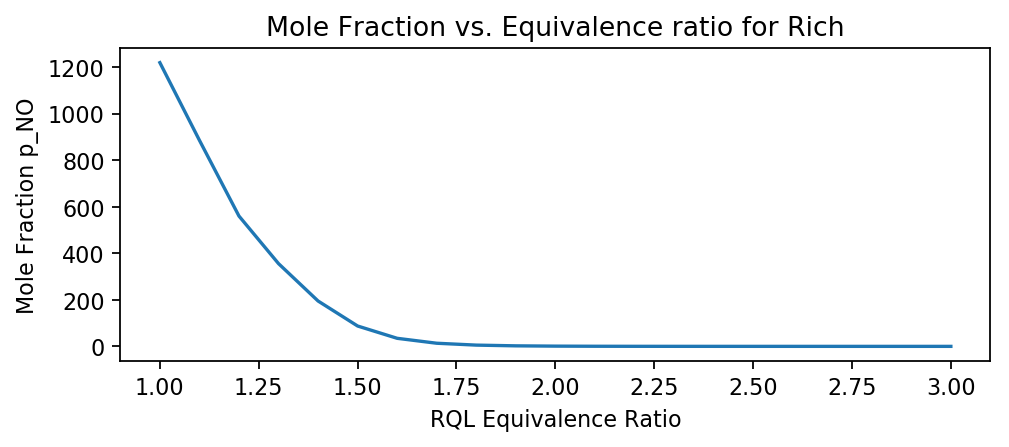

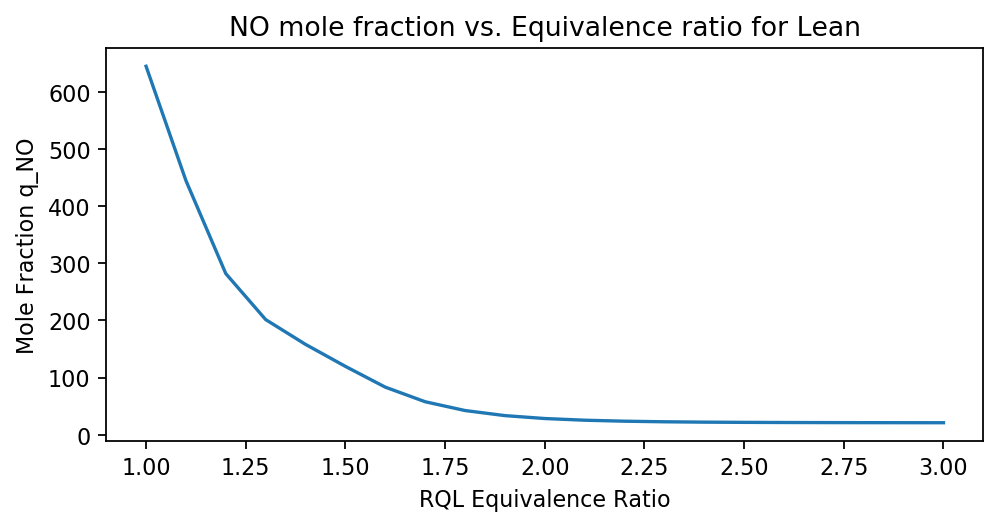

In [6]:
fig=plt.figure(figsize=(12, 5), dpi = 160)
plt.clf()
plt.subplot(2,2,2)
NO_plt=plt.plot(phi, p_NO)
plt.title('Mole Fraction vs. Equivalence ratio for Rich')

plt.xlabel('RQL Equivalence Ratio')
plt.ylabel('Mole Fraction p_NO')
plt.tight_layout()
plt.show()

fig=plt.figure(figsize=(12, 6), dpi = 160)
plt.clf()
plt.subplot(2,2,2)
NO_plt=plt.plot(phi, q_NO)
plt.title('NO mole fraction vs. Equivalence ratio for Lean')
plt.xlabel('RQL Equivalence Ratio')
plt.ylabel('Mole Fraction q_NO')
plt.tight_layout()
plt.show()

#### 2.2.2 Mole Fraction X${}_{CO}$  vs RQL Equivalence Ratio ${\varphi }_R$

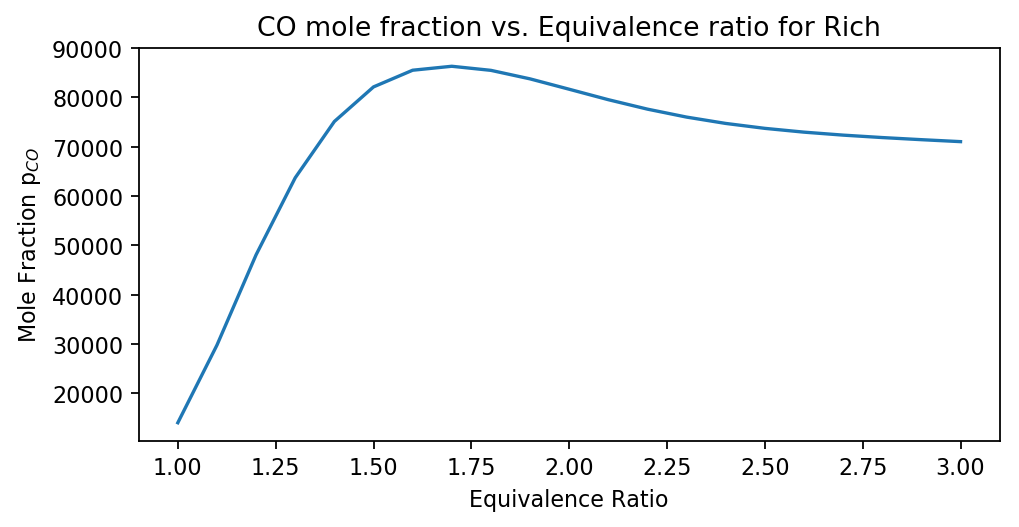

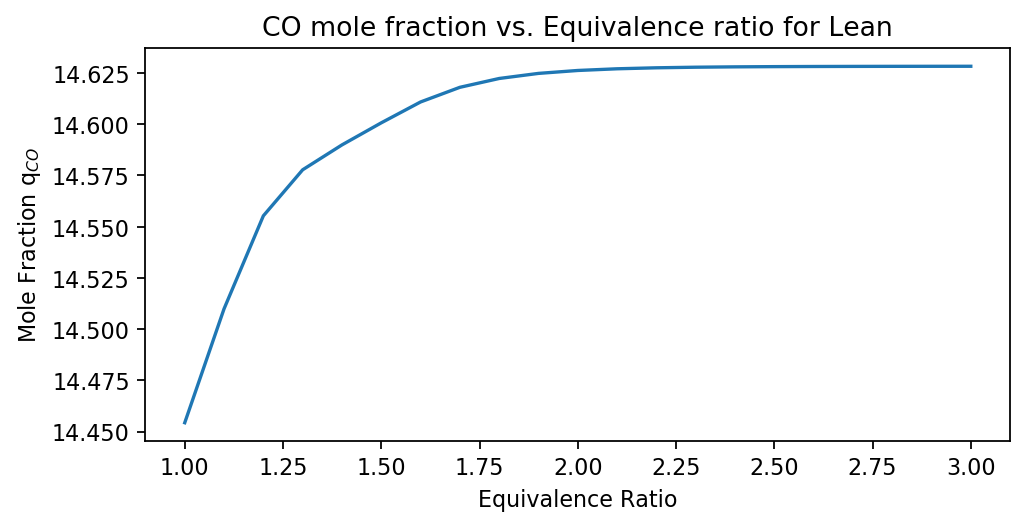

In [7]:
fig=plt.figure(figsize=(12, 6), dpi= 160)
plt.clf()
plt.subplot(2,2,2)
CO_pltrich=plt.plot(phi, p_CO)
plt.title('CO mole fraction vs. Equivalence ratio for Rich')

plt.xlabel('Equivalence Ratio')
plt.ylabel('Mole Fraction p$_{CO}$')
plt.tight_layout()
plt.show()

fig=plt.figure(figsize=(12, 6), dpi= 160)
plt.clf()
plt.subplot(2,2,2)
CO_pltlean=plt.plot(phi, q_CO)
plt.title('CO mole fraction vs. Equivalence ratio for Lean')

plt.xlabel('Equivalence Ratio')
plt.ylabel('Mole Fraction q$_{CO}$')
plt.tight_layout()
plt.show()

#### 2.2.3 Mole Fraction X${}_{CH4}$  vs RQL Equivalence Ratio ${\varphi }_R$

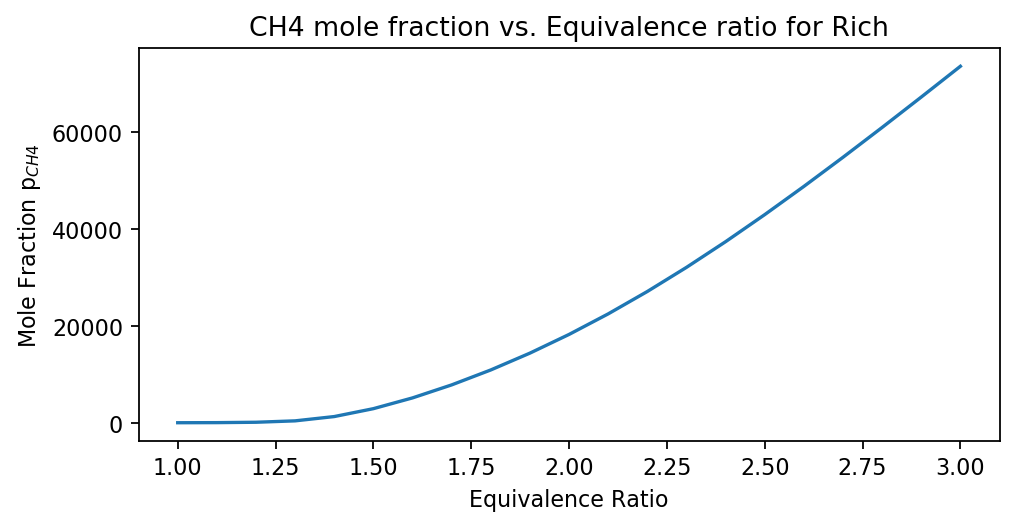

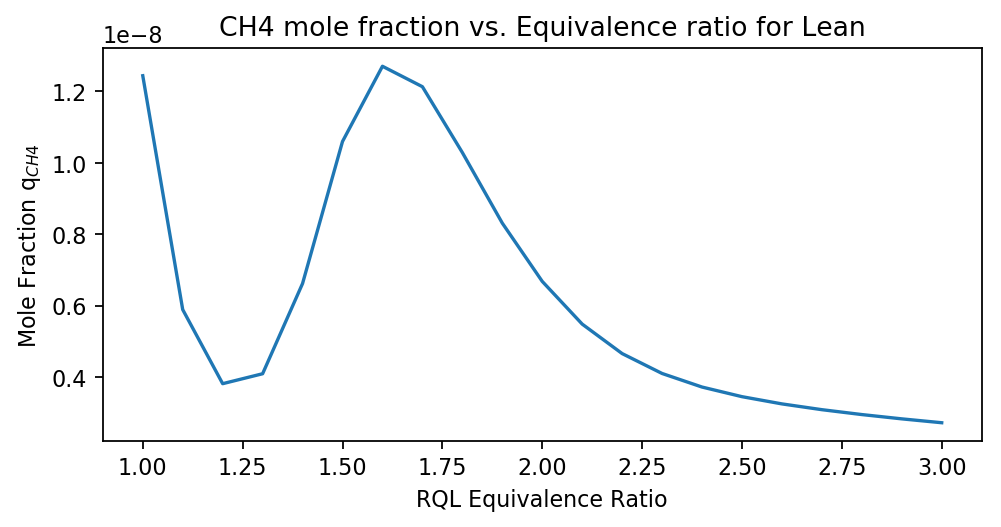

In [8]:
fig=plt.figure(figsize=(12, 6), dpi= 160)
plt.clf()
plt.subplot(2,2,2)
CH4_pltrich=plt.plot(phi, p_CH4)
plt.title('CH4 mole fraction vs. Equivalence ratio for Rich')

plt.xlabel('Equivalence Ratio')
plt.ylabel('Mole Fraction p$_{CH4}$')
plt.tight_layout()
plt.show()

fig=plt.figure(figsize=(12, 6), dpi= 160)
plt.clf()
plt.subplot(2,2,2)
CH4_pltlean=plt.plot(phi, q_CH4)
plt.title('CH4 mole fraction vs. Equivalence ratio for Lean')

plt.xlabel('RQL Equivalence Ratio')
plt.ylabel('Mole Fraction q$_{CH4}$')
plt.tight_layout()
plt.show()

####  2.2.4 Temperature (${K}$)  vs RQL Equivalence Ratio ${\varphi }_R$

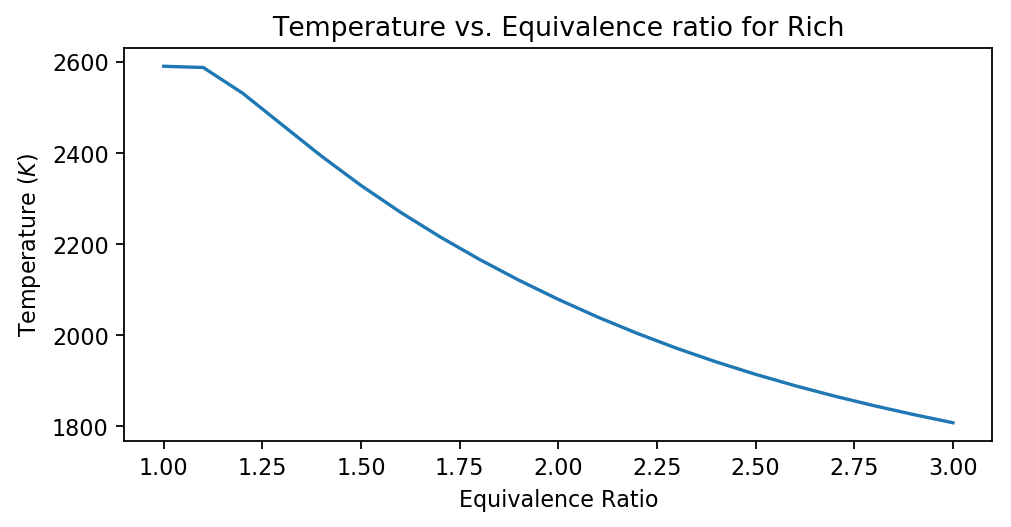

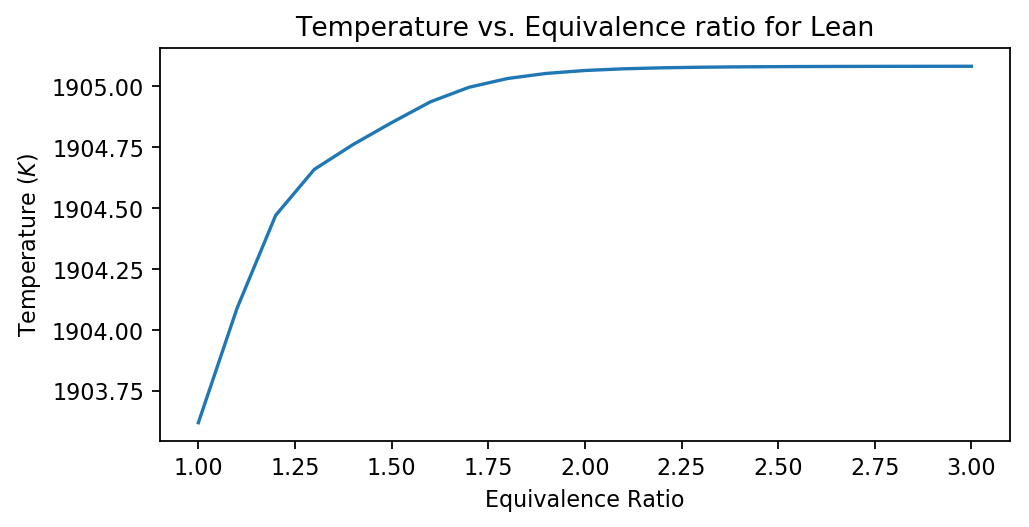

In [9]:
fig1=plt.figure(figsize=(12, 6), dpi = 160)
plt.clf()
plt.subplot(2,2,2)
T_pltrich=plt.plot(phi, T2_complete)
plt.title('Temperature vs. Equivalence ratio for Rich')
plt.xlabel('Equivalence Ratio')
plt.ylabel('Temperature (${K}$)')
plt.tight_layout()
plt.show()

fig2=plt.figure(figsize=(12, 6), dpi = 160)
plt.clf()
plt.subplot(2,2,2)
T_pltlean=plt.plot(phi, T1_complete)
plt.title('Temperature vs. Equivalence ratio for Lean')
plt.xlabel('Equivalence Ratio')
plt.ylabel('Temperature (${K}$)')
plt.tight_layout()
plt.show()

#### 2.2.5 CO molar fraction (${X_CO}$) , NO molar fraction (${X_NO}$} vs RQL Equivalence Ratio ${\varphi }_R$ Graph 1 

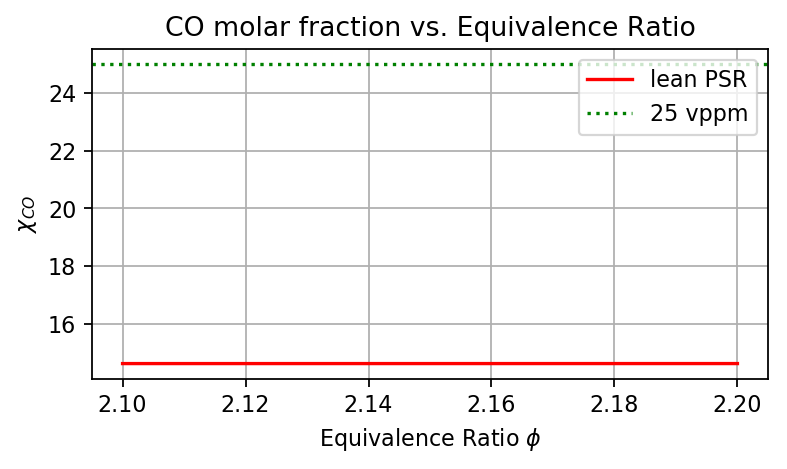

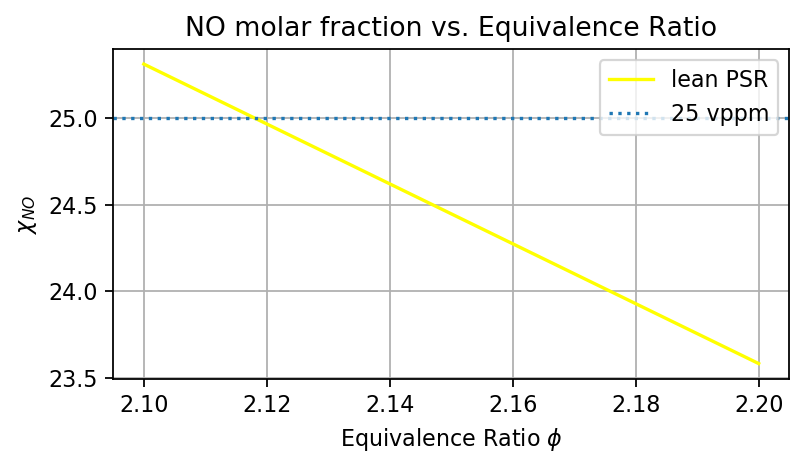

In [10]:
k = 0

for k in range(20,0,-1):
    
    if p_CO[i]<25 and p_NO[i]<25:
        
        k=k+1
        
phi_25 = np.zeros(k+1)
q_CO25 = np.zeros(k+1)
q_NO25 = np.zeros(k+1)
        
for m in range (0,k+1,1):
    phi_25[m] = phi[m+11]
    q_CO25[m] = q_CO[m+11]
    q_NO25[m] = q_NO[m+11]
            
fig = plt.figure(figsize = (12,6), dpi =160)
plt.subplot(2, 2, 2)
plt.plot(phi_25, q_CO25, 'r-', label = "lean PSR", color = 'red')
plt.xlabel('Equivalence Ratio $\phi$')
plt.ylabel('$\chi_{CO}$')
plt.axhline(25, label = '25 vppm', ls = 'dotted', color = 'green')
plt.title('CO molar fraction vs. Equivalence Ratio')
plt.legend(loc=1)
plt.grid(True)

fig = plt.figure(figsize = (12,6), dpi =160)
plt.subplot(2, 2, 2)
plt.plot(phi_25, q_NO25, 'r-', label = "lean PSR", color = 'yellow')
plt.xlabel('Equivalence Ratio $\phi$')
plt.ylabel('$\chi_{NO}$')
plt.axhline(25, label = '25 vppm', ls = 'dotted', )
plt.title('NO molar fraction vs. Equivalence Ratio')
plt.legend(loc=1)
plt.grid(True)


#### 2.2.6 Mole Fractions of CO, NO and CH4 vs RQL Equivalence Ratio Graph 2

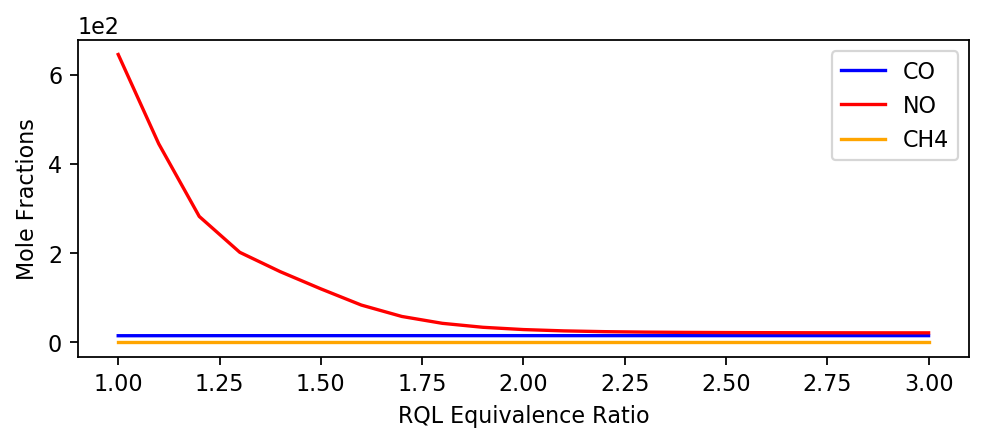

In [11]:
fig=plt.figure(figsize=(12, 5), dpi= 160)
plt.clf()
plt.subplot(2,2,2)
plt.plot(phi, q_CO, label= 'CO', color='blue')
plt.plot(phi, q_NO, label='NO', color='red')
plt.plot(phi, q_CH4, label='CH4', color='orange')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.xlabel('RQL Equivalence Ratio')
plt.ylabel('Mole Fractions')
plt.tight_layout()
plt.legend()
plt.show()


### 2.3 - Comparison and Explanation

In order to get a better understanding of the functionality of the RQL Combustor, we are now asked to compare its pollutant emissions (XMAX for each pollutant) with the single PSR Combustor and the Equilibrium calculations. Below are the values

    SPECIES      Equilibrium      PSR Combuster          RQL Combuster
    CH4        5.48799384e-18     8.55205917           2.7194197039166287e-09
    NO         3884.57825107      21.98736946           20.896103682076205
    CO         14.14964164        124.18476848          14.628281104538601

Comparing pollutant emissions of the RQL Combustor to the PSR Combustor, it can be seen that for NO, RQL Combuster has lower emission compared  to PSR Combuster. A similar pattern can be seen for CO however it is to be noted that the difference between the emissions is higher compared to NO. In the case of UHC, the emissions of the PSR is always higher than that of the RQL.

Comparing the pollutant emissions of the RQL Combustor to the Equilibrium Calculations, it can be seen that for NO, the emissions of the RQL is always lower than that of the Equilibrium Calculations by a huge difference. In the case for CO, the emissions of the RQL is always greater by a small amount than that of the Equilibrium Calculations. In the case of UHC, the emissions of the RQL is higher than that of the Equilibrium Calculations.




## Conclusion

In conclusion we were initially asked to look into the Equilibrium Combustion of Methane with Air, and then compare it to different types of combustor designs (PSR and RQL). CANTERA was used to effectively simulate chemical reactions and to measure the mole fractions of common pollutant species such as UHC, CO and NO. When comparing the PSR Combustor to the RQL Combustor, it was concluded that the RQL was a better option because it had lower amounts of pollutant generation due to the multi-staged combustion processes.

## References


1.	Cengel, Y. A., & Boles, M. A. (2011). Thermodynamics An Engineering Approach (7th Edition in SI units ed.). New York , USA: McGraw-Hill Companies.
2.	http://www.energy.ca.gov/2012publications/CEC-500-2012-001/CEC-500-2012-001.pdf
3.	http://cdn.intechopen.com/pdfs-wm/45115.pdf
